<a href="https://www.kaggle.com/code/shreeyashah/optuna-rf-hyperparameter-tuning-and-visualization?scriptVersionId=285743342" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


## Importing the Libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Data

In [77]:
df = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Exploratory Data Analysis

In [78]:
df.shape

(200, 6)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [80]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [81]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



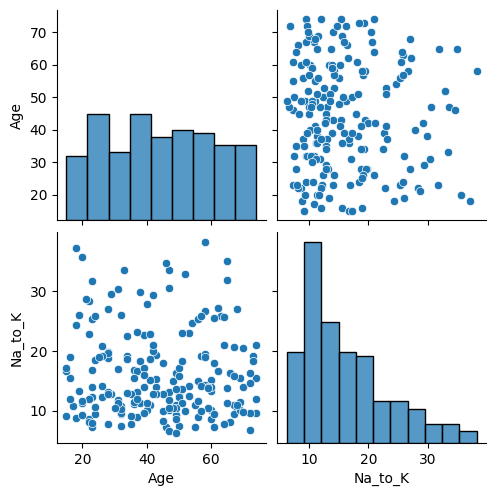

In [82]:
sns.pairplot(df)
plt.show()

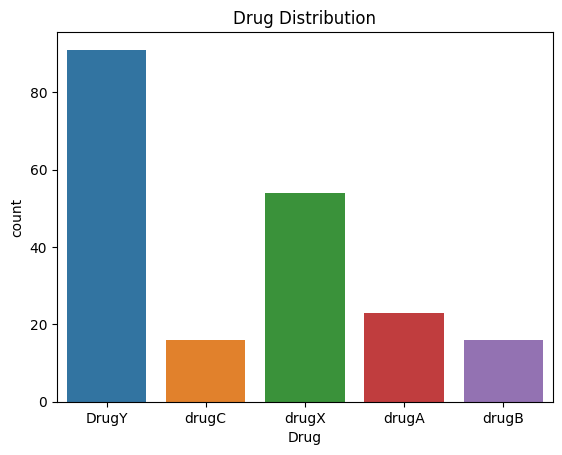

In [83]:
sns.countplot(x=df['Drug'])
plt.title('Drug Distribution')
plt.show()

In [84]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Encoding Categorical Data

In [85]:
X = pd.get_dummies(df[['Sex', 'BP', 'Cholesterol']])

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

## Optuna for RF Hyperparameter Tuning

In [88]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [89]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_leaf= trial.suggest_int('min_samples_leaf', 1,5)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf = min_samples_leaf,
        random_state=42
    )

    score = cross_val_score(model, X_train, y_train, cv=3, scoring = 'accuracy').mean()

    return score

## TPE Sampler

In [90]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=50)

[I 2025-12-12 14:28:24,245] A new study created in memory with name: no-name-2d0c6b53-c925-42a7-a147-eeac5590f7ad
[I 2025-12-12 14:28:24,854] Trial 0 finished with value: 0.5124621476822734 and parameters: {'n_estimators': 152, 'max_depth': 17, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.5124621476822734.
[I 2025-12-12 14:28:25,627] Trial 1 finished with value: 0.5187514558583741 and parameters: {'n_estimators': 199, 'max_depth': 19, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.5187514558583741.
[I 2025-12-12 14:28:26,072] Trial 2 finished with value: 0.5124621476822734 and parameters: {'n_estimators': 109, 'max_depth': 14, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.5187514558583741.
[I 2025-12-12 14:28:26,455] Trial 3 finished with value: 0.5124621476822734 and parameters: {'n_estimators': 91, 'max_depth': 11, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.5187514558583741.
[I 2025-12-12 14:28:26,673] Trial 4 finished with value: 0.5124621476822734

In [91]:
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.5187514558583741
Best hyperparameters: {'n_estimators': 199, 'max_depth': 19, 'min_samples_leaf': 5}


In [92]:
best_model = RandomForestClassifier(**study.best_trial.params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')

Test Accuracy with best hyperparameters: 0.50


## Random Sampler

In [94]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler())  
study.optimize(objective, n_trials=50)  

[I 2025-12-12 14:28:56,600] A new study created in memory with name: no-name-60a11e8d-9a24-4216-963d-b8233862a01c
[I 2025-12-12 14:28:56,977] Trial 0 finished with value: 0.5124621476822734 and parameters: {'n_estimators': 90, 'max_depth': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.5124621476822734.
[I 2025-12-12 14:28:57,397] Trial 1 finished with value: 0.5124621476822734 and parameters: {'n_estimators': 105, 'max_depth': 11, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.5124621476822734.
[I 2025-12-12 14:28:57,814] Trial 2 finished with value: 0.5124621476822734 and parameters: {'n_estimators': 104, 'max_depth': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.5124621476822734.
[I 2025-12-12 14:28:58,614] Trial 3 finished with value: 0.5186349871884463 and parameters: {'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.5186349871884463.
[I 2025-12-12 14:28:59,241] Trial 4 finished with value: 0.5186349871884463 

In [95]:
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.5248078266946191
Best hyperparameters: {'n_estimators': 186, 'max_depth': 6, 'min_samples_leaf': 2}


In [96]:
best_model = RandomForestClassifier(**study.best_trial.params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')

Test Accuracy with best hyperparameters: 0.50


## Grid Sampler

In [98]:
search_space = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1,3,5]
}
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.GridSampler(search_space))
study.optimize(objective)

[I 2025-12-12 14:29:23,591] A new study created in memory with name: no-name-daa23195-9a75-4f0c-947e-b573a1194e25
[I 2025-12-12 14:29:24,029] Trial 0 finished with value: 0.5124621476822734 and parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.5124621476822734.
[I 2025-12-12 14:29:24,243] Trial 1 finished with value: 0.5124621476822734 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.5124621476822734.
[I 2025-12-12 14:29:24,841] Trial 2 finished with value: 0.5186349871884463 and parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.5186349871884463.
[I 2025-12-12 14:29:25,459] Trial 3 finished with value: 0.5186349871884463 and parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.5186349871884463.
[I 2025-12-12 14:29:25,668] Trial 4 finished with value: 0.4815979501514092 

In [99]:
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.5187514558583741
Best hyperparameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_leaf': 5}


In [100]:
best_model = RandomForestClassifier(**study.best_trial.params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')

Test Accuracy with best hyperparameters: 0.47


## Visualization with Optuna

In [102]:
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

In [103]:
plot_optimization_history(study).show()

In [104]:
plot_parallel_coordinate(study).show()

In [105]:
plot_slice(study).show()

In [106]:
plot_contour(study).show()

In [107]:
plot_param_importances(study).show()